# **Data C102 Final Project**

# Preparation

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smt
import statsmodels.api as sm
from scipy.stats import norm
import random

In [ ]:
# Set a seed for reproducibility
seed_value = 100
random.seed(seed_value)

In [ ]:
# Load the data
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')
# Import allstar player from each season
# https://www.kaggle.com/datasets/ethankeyes/nba-all-star-players-and-stats-1980-2022
allstar = pd.read_csv('final_data.csv')

<ipython-input-60-fc7ae244bb6e>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('games_details.csv')


# DATA Overview

In [ ]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [ ]:
players.groupby('PLAYER_NAME').value_counts()

PLAYER_NAME         TEAM_ID     PLAYER_ID  SEASON
AJ Hammons          1610612742  1627773    2016      1
                    1610612748  1627773    2017      1
AJ Price            1610612764  201985     2012      1
                    1610612756  201985     2014      1
                    1610612754  201985     2014      1
                                                    ..
Zoran Dragic        1610612756  204054     2014      1
                    1610612748  204054     2014      1
Zydrunas Ilgauskas  1610612748  980        2010      1
                    1610612739  980        2009      1
Zylan Cheatham      1610612740  1629597    2019      1
Length: 7228, dtype: int64

In [ ]:
ranking.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,2.103420e+05,210342.0,210342.000000,210342.000000,210342.000000,210342.000000,210342.000000,3990.000000
mean,1.610613e+09,0.0,21401.054773,56.659735,28.333357,28.326378,0.492833,0.600000
std,8.641501e+00,0.0,2395.250417,28.644294,17.268500,17.260557,0.187763,0.489959
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,32.000000,14.000000,14.000000,0.372000,0.000000
50%,1.610613e+09,0.0,22011.000000,67.000000,28.000000,29.000000,0.500000,1.000000
75%,1.610613e+09,0.0,22017.000000,82.000000,42.000000,41.000000,0.621000,1.000000
max,1.610613e+09,0.0,22022.000000,82.000000,73.000000,72.000000,1.000000,1.000000


In [ ]:
teams.describe()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,YEARFOUNDED,ARENACAPACITY
count,30.0,3.000000e+01,30.000000,30.0,30.000000,26.000000
mean,0.0,1.610613e+09,1969.700000,2019.0,1969.700000,18553.307692
std,0.0,8.803408e+00,16.698441,0.0,16.698441,3916.923362
min,0.0,1.610613e+09,1946.000000,2019.0,1946.000000,0.000000
25%,0.0,1.610613e+09,1952.000000,2019.0,1952.000000,18641.500000
50%,0.0,1.610613e+09,1970.000000,2019.0,1970.000000,19131.000000
75%,0.0,1.610613e+09,1979.000000,2019.0,1979.000000,19790.750000
max,0.0,1.610613e+09,2002.000000,2019.0,2002.000000,21711.000000


# DATA Cleaning

In [ ]:
#Wants the data to not include the 2022 to 2023 season data:
cutoff_date = pd.to_datetime('2022-10-18')

#games_df
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
filtered_games = games[games['GAME_DATE_EST'] < cutoff_date]
filtered_games = filtered_games.groupby('GAME_ID').first().reset_index()

#games_details_df
filtered_games_details = pd.merge(games_details, filtered_games[['GAME_ID']], on='GAME_ID', how='inner')

#ranking_df
filtered_ranking = ranking[ranking['SEASON_ID'] != 22022]

In [ ]:
#Dealing with the nan values in each dataset
#Find which column contain missing value in each dataset
#Find rows with missing values in each dataset

#games
print(filtered_games.isna().sum())
rows_with_missing_values = filtered_games[filtered_games.isnull().any(axis=1)]
# print(rows_with_missing_values.head())

#We can observe that the missed-value records are in 2003 and the missing values are all in the tactical
#indicators(i.e. PTS_home) which is crucial in doing analysis, thus we decide to drop these rows with missing values:
dealt_games = filtered_games.dropna()

GAME_ID              0
GAME_DATE_EST        0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64


In [ ]:
#games details
print(filtered_games_details.isna().sum())
rows_with_missing_values = filtered_games_details[filtered_games_details.isnull().any(axis=1)]
# print(rows_with_missing_values.head())

dealt_games_details = filtered_games_details.dropna(subset=[ 'MIN', 'FGM','FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
                               'FT_PCT','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',])

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       405442
COMMENT              548756
MIN                  107682
FGM                  107682
FGA                  107682
FG_PCT               107682
FG3M                 107682
FG3A                 107682
FG3_PCT              107682
FTM                  107682
FTA                  107682
FT_PCT               107682
OREB                 107682
DREB                 107682
REB                  107682
AST                  107682
STL                  107682
BLK                  107682
TO                   107682
PF                   107682
PTS                  107682
PLUS_MINUS           131343
dtype: int64


In [ ]:
#players
print(players.isna().sum())
rows_with_missing_values = players[players.isnull().any(axis=1)]
# print(rows_with_missing_values.head())

#No missing values

PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64


In [ ]:
#ranking
print(filtered_ranking.isna().sum())
rows_with_missing_values = filtered_ranking[filtered_ranking.isnull().any(axis=1)]
# print(rows_with_missing_values.head())

#Returntoplay column is the only column that contains missing values, which is not important for further analysis, thus no need to deal with it.

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     204372
dtype: int64


In [ ]:
#teams
print(teams.isna().sum())
rows_with_missing_values = teams[teams.isnull().any(axis=1)]
# print(rows_with_missing_values.head())

cleaned_teams = teams.dropna()
cleaned_teams = cleaned_teams[cleaned_teams['ARENACAPACITY'] > 0]

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64


In [ ]:
# Adding in location information to the game dataframe
merged_games = pd.merge(dealt_games, cleaned_teams[['TEAM_ID', 'ARENACAPACITY']], left_on ="HOME_TEAM_ID", right_on = "TEAM_ID", how = "left")
merged_games.columns

Index(['GAME_ID', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID', 'ARENACAPACITY'],
      dtype='object')

In [ ]:
# Create separate DataFrames for home team and away team
home_team_df = merged_games[['GAME_ID', 'HOME_TEAM_ID', 'SEASON',  'PTS_home', 'FG_PCT_home',
                   'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS', 'ARENACAPACITY']].copy()
away_team_df = merged_games[['GAME_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_away', 'FG_PCT_away',
                   'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'ARENACAPACITY']].copy()
home_team_df.columns = ['GAME_ID', 'TEAM_ID', 'SEASON', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'HOME_TEAM_WINS', 'ARENACAPACITY']
away_team_df.columns = ['GAME_ID', 'TEAM_ID', 'SEASON', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'HOME_TEAM_WINS', 'ARENACAPACITY']

# Add a new column indicating whether it's the home team or away team
home_team_df['TEAM_TYPE'] = 'Home'
away_team_df['TEAM_TYPE'] = 'Away'

# Concatenate the two DataFrames
reshaped_game_df = pd.concat([home_team_df, away_team_df], ignore_index=True)
reshaped_game_df['Outcome'] = reshaped_game_df.apply(lambda row: 1 if (row['TEAM_TYPE'] == 'Home' and row['HOME_TEAM_WINS'] == 1) or (row['TEAM_TYPE'] == 'Away' and row['HOME_TEAM_WINS'] == 0) else 0, axis=1)
reshaped_game_df['Chances of Winning'] = reshaped_game_df['PTS'] / (reshaped_game_df.groupby(['SEASON', 'GAME_ID'])['PTS'].transform('sum'))

# Display the resulting DataFrame
reshaped_game_df.head()

,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,HOME_TEAM_WINS,ARENACAPACITY,TEAM_TYPE,Outcome,Chances of Winning
0,10300001,1610612762,2003,90.0,0.457,0.735,0.143,23.0,41.0,1,20148.0,Home,1,0.514286
1,10300002,1610612763,2003,105.0,0.494,0.618,0.267,25.0,48.0,1,18119.0,Home,1,0.527638
2,10300003,1610612765,2003,96.0,0.391,0.600,0.444,19.0,37.0,0,21000.0,Home,0,0.489796
3,10300004,1610612742,2003,99.0,0.488,0.667,0.167,20.0,52.0,1,19200.0,Home,1,0.526596
4,10300005,1610612757,2003,104.0,0.527,0.657,0.429,22.0,33.0,1,19980.0,Home,1,0.565217


In [ ]:
# Then we want to add in additional information about the game that we can get from the game detail dataframe
grouped_games_details = dealt_games_details.groupby(['GAME_ID', 'TEAM_ID']).agg({
    'MIN': 'sum',
    'FGM': 'sum',
    'FGA': 'sum',
    'FG_PCT': 'mean',
    'FG3M': 'sum',
    'FG3A': 'sum',
    'FG3_PCT': 'mean',
    'FTM': 'sum',
    'FTA': 'sum',
    'FT_PCT': 'mean',
    'OREB': 'sum',
    'DREB': 'sum',
    'REB': 'sum',
    'AST': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TO': 'sum',
    'PF': 'sum',
    'PTS': 'sum',
    'PLUS_MINUS': 'sum'
}).reset_index()


reshaped_game_df = pd.merge(reshaped_game_df, grouped_games_details[['GAME_ID', 'TEAM_ID', 'TO', 'STL', 'PF', 'BLK']], on=['GAME_ID', 'TEAM_ID'], suffixes=('', ''), how='left')
reshaped_game_df.head()

,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,HOME_TEAM_WINS,ARENACAPACITY,TEAM_TYPE,Outcome,Chances of Winning,TO,STL,PF,BLK
0,10300001,1610612762,2003,90.0,0.457,0.735,0.143,23.0,41.0,1,20148.0,Home,1,0.514286,18.0,8.0,26.0,4.0
1,10300002,1610612763,2003,105.0,0.494,0.618,0.267,25.0,48.0,1,18119.0,Home,1,0.527638,25.0,18.0,35.0,7.0
2,10300003,1610612765,2003,96.0,0.391,0.600,0.444,19.0,37.0,0,21000.0,Home,0,0.489796,13.0,15.0,27.0,3.0
3,10300004,1610612742,2003,99.0,0.488,0.667,0.167,20.0,52.0,1,19200.0,Home,1,0.526596,17.0,9.0,30.0,5.0
4,10300005,1610612757,2003,104.0,0.527,0.657,0.429,22.0,33.0,1,19980.0,Home,1,0.565217,15.0,17.0,22.0,3.0


In [ ]:
reshaped_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52092 entries, 0 to 52091
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GAME_ID             52092 non-null  int64  
 1   TEAM_ID             52092 non-null  int64  
 2   SEASON              52092 non-null  int64  
 3   PTS                 52092 non-null  float64
 4   FG_PCT              52092 non-null  float64
 5   FT_PCT              52092 non-null  float64
 6   FG3_PCT             52092 non-null  float64
 7   AST                 52092 non-null  float64
 8   REB                 52092 non-null  float64
 9   HOME_TEAM_WINS      52092 non-null  int64  
 10  ARENACAPACITY       43560 non-null  float64
 11  TEAM_TYPE           52092 non-null  object 
 12  Outcome             52092 non-null  int64  
 13  Chances of Winning  52092 non-null  float64
 14  TO                  52092 non-null  float64
 15  STL                 52092 non-null  float64
 16  PF  

# EDA

### 1. Research question 1

In [ ]:
reshaped_game_df.columns

Index(['GAME_ID', 'TEAM_ID', 'SEASON', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT',
       'AST', 'REB', 'HOME_TEAM_WINS', 'ARENACAPACITY', 'TEAM_TYPE', 'Outcome',
       'Chances of Winning', 'TO', 'STL', 'PF', 'BLK'],
      dtype='object')

<ipython-input-23-abe7492f6140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = reshaped_game_df.corr()


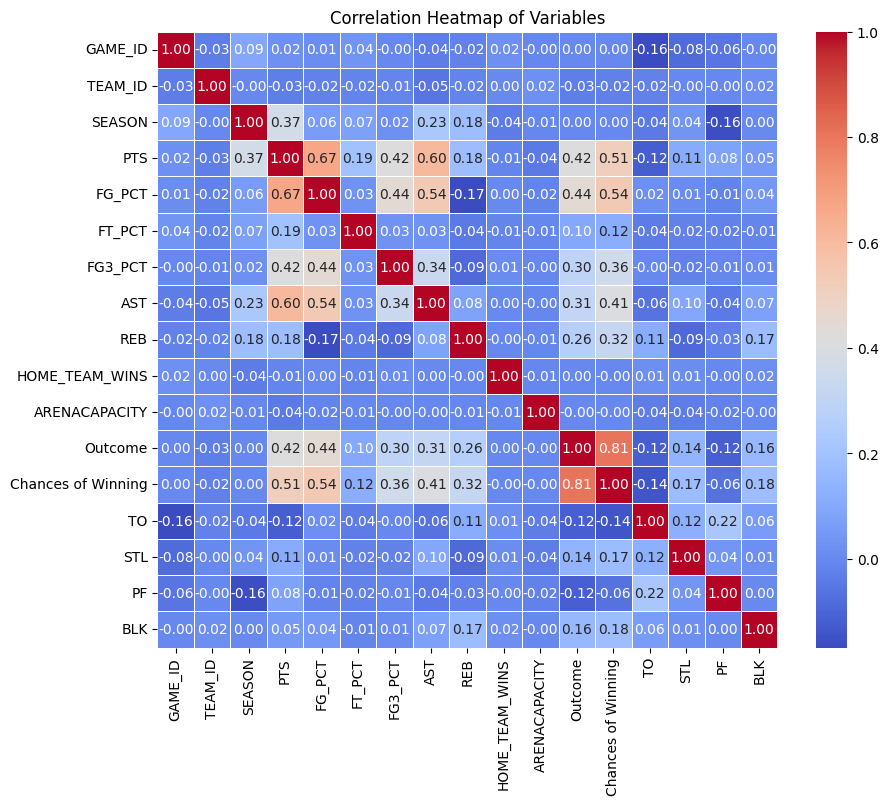

In [ ]:
# Create a heatmap
correlation_matrix = reshaped_game_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


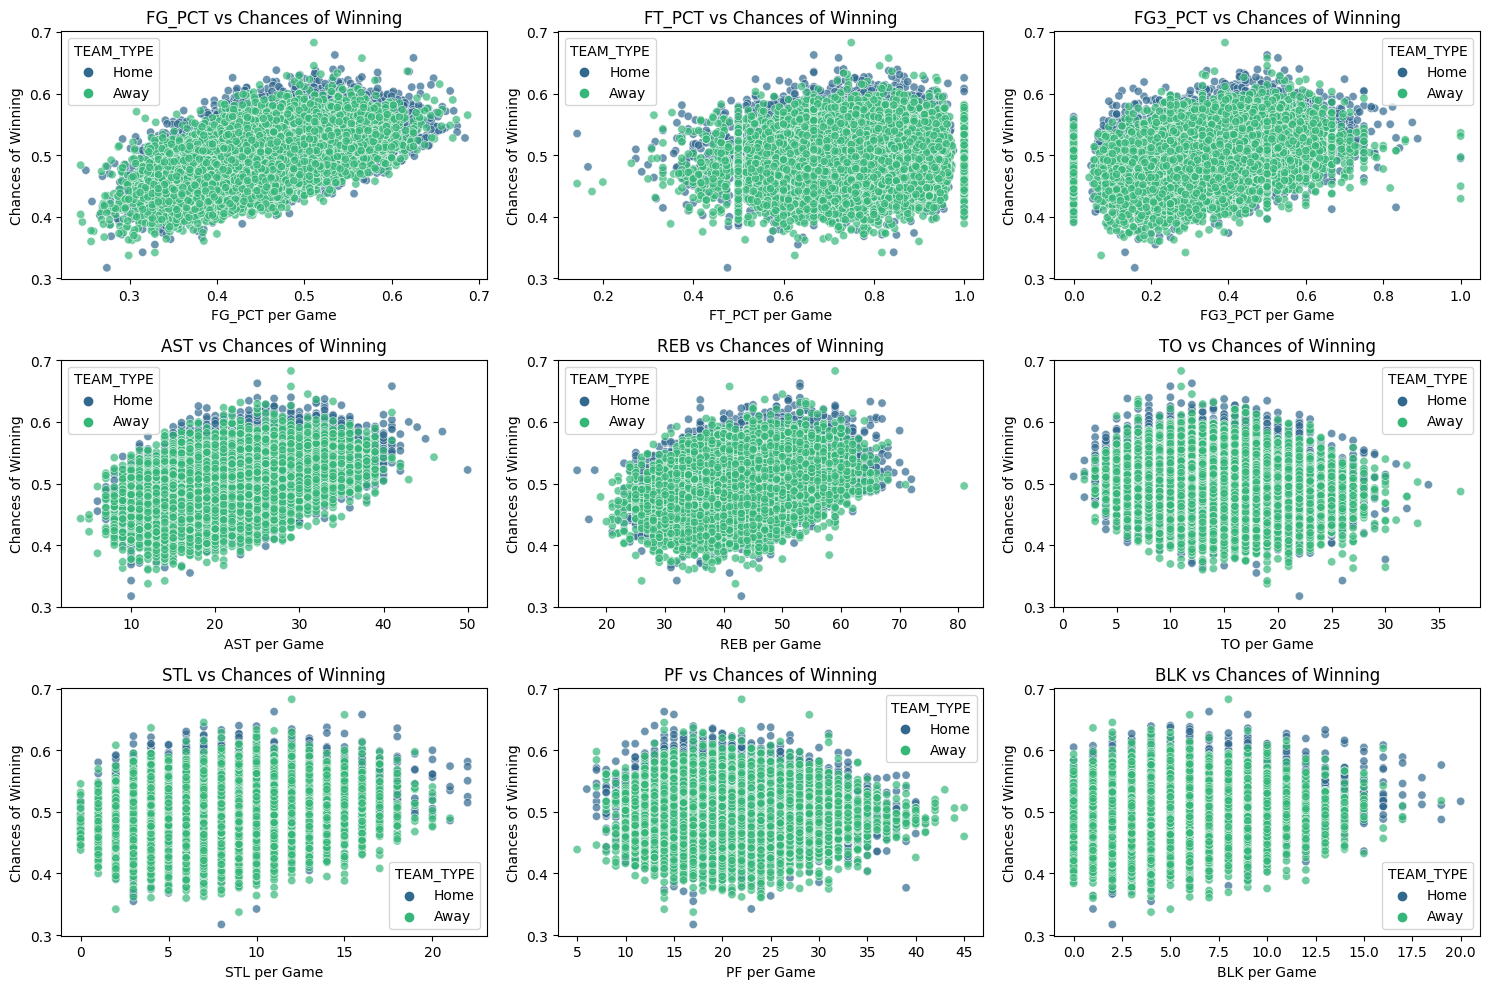

In [ ]:

factors_to_visualize = ['FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TO', 'STL', 'PF', 'BLK']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

# Loop through the columns and create scatter plots
for i, column in enumerate(factors_to_visualize):
    row = i // 3
    col = i % 3

    sns.scatterplot(x=column, y='Chances of Winning', data=reshaped_game_df, palette='viridis', hue='TEAM_TYPE', marker='o', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{column} vs Chances of Winning')
    axes[i].set_xlabel(f'{column} per Game')
    axes[i].set_ylabel('Chances of Winning')

plt.tight_layout()
plt.show()


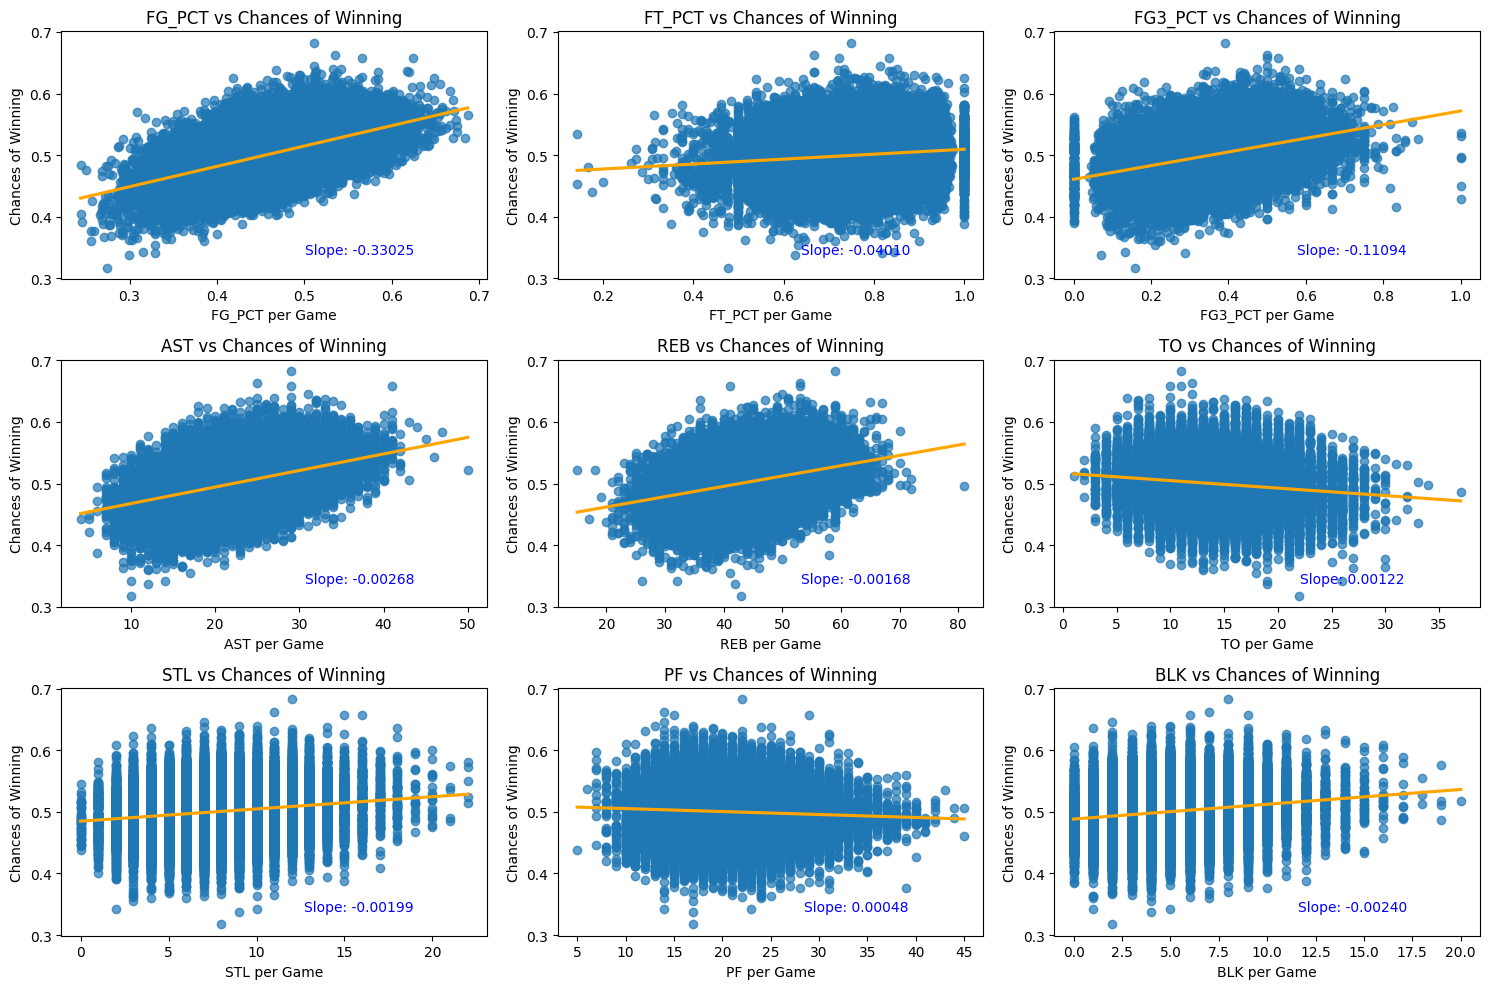

In [ ]:
factors_to_visualize = ['FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TO', 'STL', 'PF', 'BLK']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(factors_to_visualize):
    row = i // 3
    col = i % 3

    sns.regplot(x=column, y='Chances of Winning', data=reshaped_game_df, ax=axes[i], line_kws={'color': 'orange'}, scatter_kws={'alpha':0.7})
    slope = ((reshaped_game_df['Chances of Winning'].mean() - reshaped_game_df['Chances of Winning']).cov(reshaped_game_df[column])) / (reshaped_game_df[column].var())
    axes[i].set_title(f'{column} vs Chances of Winning')
    axes[i].set_xlabel(f'{column} per Game')
    axes[i].set_ylabel('Chances of Winning')
    axes[i].annotate(f'Slope: {slope:.5f}', xy=(0.7, 0.1), xycoords='axes fraction', ha='center', color='blue')


plt.tight_layout()
plt.show()


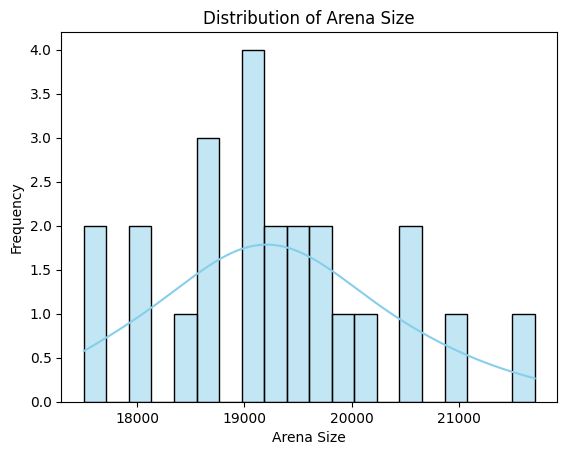

In [ ]:
# We want to see the general distribution of Arena Capacity among all the different arena that are used
all_arena_sizes = cleaned_teams.groupby('ARENA').first()

sns.histplot(all_arena_sizes['ARENACAPACITY'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Arena Size')
plt.xlabel('Arena Size')
plt.ylabel('Frequency')
plt.show()

### 2. Research Question 2 - outcome regression

EDA for research question 2 is in the section Research Question 2: Causal Inference due to the special edit on data cleaning.

# Research Question 1: Multiple Hypothesis Testing

In [ ]:
reshaped_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52092 entries, 0 to 52091
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GAME_ID             52092 non-null  int64  
 1   TEAM_ID             52092 non-null  int64  
 2   SEASON              52092 non-null  int64  
 3   PTS                 52092 non-null  float64
 4   FG_PCT              52092 non-null  float64
 5   FT_PCT              52092 non-null  float64
 6   FG3_PCT             52092 non-null  float64
 7   AST                 52092 non-null  float64
 8   REB                 52092 non-null  float64
 9   HOME_TEAM_WINS      52092 non-null  int64  
 10  ARENACAPACITY       43560 non-null  float64
 11  TEAM_TYPE           52092 non-null  object 
 12  Outcome             52092 non-null  int64  
 13  Chances of Winning  52092 non-null  float64
 14  TO                  52092 non-null  float64
 15  STL                 52092 non-null  float64
 16  PF  

In [ ]:
# Feature Engineering for Arena Size
# Categorize arenas that are larger than the median size as large, and smaller than the median size as small

reshaped_game_df_arena_cleaned = reshaped_game_df.dropna()
median_arenacapacity = reshaped_game_df_arena_cleaned['ARENACAPACITY'].median()
reshaped_game_df_arena_cleaned['ArenaSize'] = np.where(reshaped_game_df_arena_cleaned['ARENACAPACITY'] > median_arenacapacity, 'Large', 'Small')
reshaped_game_df_arena_cleaned.head()

<ipython-input-76-6ed6e5f0c864>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_game_df_arena_cleaned['ArenaSize'] = np.where(reshaped_game_df_arena_cleaned['ARENACAPACITY'] > median_arenacapacity, 'Large', 'Small')


,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,HOME_TEAM_WINS,ARENACAPACITY,TEAM_TYPE,Outcome,Chances of Winning,TO,STL,PF,BLK,ArenaSize
0,10300001,1610612762,2003,90.0,0.457,0.735,0.143,23.0,41.0,1,20148.0,Home,1,0.514286,18.0,8.0,26.0,4.0,Large
1,10300002,1610612763,2003,105.0,0.494,0.618,0.267,25.0,48.0,1,18119.0,Home,1,0.527638,25.0,18.0,35.0,7.0,Small
2,10300003,1610612765,2003,96.0,0.391,0.600,0.444,19.0,37.0,0,21000.0,Home,0,0.489796,13.0,15.0,27.0,3.0,Large
3,10300004,1610612742,2003,99.0,0.488,0.667,0.167,20.0,52.0,1,19200.0,Home,1,0.526596,17.0,9.0,30.0,5.0,Large
4,10300005,1610612757,2003,104.0,0.527,0.657,0.429,22.0,33.0,1,19980.0,Home,1,0.565217,15.0,17.0,22.0,3.0,Large


In [ ]:
data = reshaped_game_df_arena_cleaned.copy()
# Hypothesis 1: Influence of Home vs. Away on Number of Steals
t_stat, p_value_stl = ttest_ind(data[data['TEAM_TYPE'] == 'Home']['STL'], data[data['TEAM_TYPE'] == 'Away']['STL'])

# Hypothesis 2: Influence of Home vs. Away on Free Throw Percentage
t_stat, p_value_ft = ttest_ind(data[data['TEAM_TYPE'] == 'Home']['FT_PCT'], data[data['TEAM_TYPE'] == 'Away']['FT_PCT'])

# Hypothesis 3: Influence of Home vs. Away on Field Goal Percentage
t_stat, p_value_fg = ttest_ind(data[data['TEAM_TYPE'] == 'Home']['FG_PCT'], data[data['TEAM_TYPE'] == 'Away']['FG_PCT'])

# Hypothesis 4: Influence of Home vs. Away on Three-Point Percentage
t_stat, p_value_fg3 = ttest_ind(data[data['TEAM_TYPE'] == 'Home']['FG3_PCT'], data[data['TEAM_TYPE'] == 'Away']['FG3_PCT'])

# Hypothesis 5: Influence of Home vs. Away on Personal Fouls
t_stat, p_value_pf = ttest_ind(data[data['TEAM_TYPE'] == 'Home']['PF'], data[data['TEAM_TYPE'] == 'Away']['REB'])

# Hypothesis 6: Effect of Arena Size on Points Scored (ttest)
t_stat, p_value_arena_size = ttest_ind(data[data['ArenaSize'] == 'Large']['PTS'], data[data['ArenaSize'] == 'Small']['PTS'])

# Print the results
p_value_results = np.array([p_value_stl, p_value_ft, p_value_fg, p_value_fg3, p_value_pf, p_value_arena_size])
print("Original p-values:", p_value_results)

Original p-values: [3.41340116e-003 1.84987401e-002 3.20326084e-105 1.59286852e-012
 0.00000000e+000 1.35486656e-004]


In [ ]:
# Bonferroni
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.

    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))

    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    decisions = (p_values <= alpha_total/len(p_values))
    return decisions

def benjamini_yekutieli(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Yekutieli.

    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])

    Returns:
        decisions: binary array of the same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    p_values_sorted = np.sort(p_values)
    m = len(p_values_sorted)
    line = np.arange(1, m + 1) * alpha / m
    max_value = max(p_values_sorted[p_values_sorted <= line / np.arange(1, m + 1)])
    decisions = (p_values <= max_value)
    return decisions, line, max_value

In [ ]:
calculated_bonferroni = bonferroni(p_value_results, 0.05)
calculated_by, line, max_value = benjamini_yekutieli(p_value_results, 0.05)

result_df_calculated = pd.DataFrame({'Original p-values': p_value_results,
              'Reject null with 0.05': np.array(p_value_results) <= 0.05,
              'Bonferroni Threshold': 0.05/len(p_value_results),
              'Reject null with Bonferroni': calculated_bonferroni,
              'BY threshold': max_value,
              'Reject null with BY': calculated_by})

result_df_calculated

,Original p-values,Reject null with 0.05,Bonferroni Threshold,Reject null with Bonferroni,BY threshold,Reject null with BY
0,3.413401e-03,True,0.008333,True,0.003413,True
1,1.849874e-02,True,0.008333,False,0.003413,False
2,3.203261e-105,True,0.008333,True,0.003413,True
3,1.592869e-12,True,0.008333,True,0.003413,True
4,0.000000e+00,True,0.008333,True,0.003413,True
5,1.354867e-04,True,0.008333,True,0.003413,True


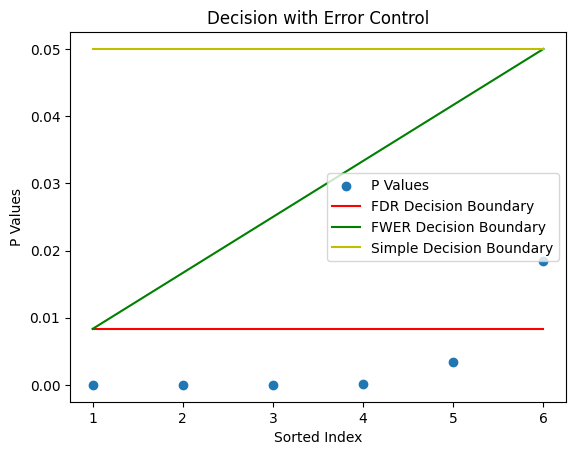

In [ ]:
x = np.arange(1, len(p_value_results)+1)

plt.scatter(x, np.sort(p_value_results), label = 'P Values')
plt.plot(x, [0.05/len(p_value_results)]*6, color = 'r', label ='FDR Decision Boundary')
plt.plot(x, line, color = 'g', label ='FWER Decision Boundary')
plt.plot(x, [0.05]*6, color = 'y', label ='Simple Decision Boundary')

plt.xlabel('Sorted Index')
plt.ylabel('P Values')
plt.title('Decision with Error Control')
plt.legend()

# Research Question 2:

### Data Cleaning for Research Question 2

In [ ]:
# merge teams info into the game
merged_games = pd.merge(filtered_games, teams[['TEAM_ID', 'ARENACAPACITY']], left_on ="HOME_TEAM_ID", right_on = "TEAM_ID", how = "left")
# Create separate DataFrames for home team and away team
home_team_df = merged_games[['GAME_ID', 'HOME_TEAM_ID', 'SEASON',  'PTS_home', 'FG_PCT_home',
                   'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS', 'ARENACAPACITY']].copy()
away_team_df = merged_games[['GAME_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_away', 'FG_PCT_away',
                   'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'ARENACAPACITY']].copy()
home_team_df.columns = ['GAME_ID', 'TEAM_ID', 'SEASON', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'HOME_TEAM_WINS', 'ARENACAPACITY']
away_team_df.columns = ['GAME_ID', 'TEAM_ID', 'SEASON', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'HOME_TEAM_WINS', 'ARENACAPACITY']

# Add a new column indicating whether it's the home team or away team
home_team_df['TEAM_TYPE'] = 'Home'
away_team_df['TEAM_TYPE'] = 'Away'

# Concatenate the two DataFrames in a time order
result_rows = []

for index, (row1, row2) in enumerate(zip(home_team_df.itertuples(index=False), away_team_df.itertuples(index=False))):
    result_rows.append(row1)
    result_rows.append(row2)

reshaped_game_df = pd.DataFrame(result_rows, columns=home_team_df.columns)
reshaped_game_df['Outcome'] = reshaped_game_df.apply(lambda row: 1 if (row['TEAM_TYPE'] == 'Home' and row['HOME_TEAM_WINS'] == 1) or (row['TEAM_TYPE'] == 'Away' and row['HOME_TEAM_WINS'] == 0) else 0, axis=1)

# Display the resulting DataFrame and dropna
reshaped_game_df = reshaped_game_df[reshaped_game_df['PTS'].notnull()]
reshaped_game_df

,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,HOME_TEAM_WINS,ARENACAPACITY,TEAM_TYPE,Outcome
0,10300001,1610612762,2003,90.0,0.457,0.735,0.143,23.0,41.0,1,20148.0,Home,1
1,10300001,1610612742,2003,85.0,0.447,0.500,0.250,20.0,38.0,1,20148.0,Away,0
2,10300002,1610612763,2003,105.0,0.494,0.618,0.267,25.0,48.0,1,18119.0,Home,1
3,10300002,1610612749,2003,94.0,0.427,0.700,0.154,20.0,43.0,1,18119.0,Away,0
4,10300003,1610612765,2003,96.0,0.391,0.600,0.444,19.0,37.0,0,21000.0,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52285,52100131,1610612759,2021,103.0,0.407,0.727,0.382,19.0,34.0,1,NaN,Away,0
52286,52100201,1610612739,2021,101.0,0.457,0.824,0.361,23.0,36.0,0,20562.0,Home,0
52287,52100201,1610612737,2021,107.0,0.488,0.909,0.290,15.0,42.0,0,20562.0,Away,1
52288,52100211,1610612746,2021,101.0,0.412,0.647,0.250,20.0,45.0,0,19060.0,Home,0


In [ ]:
# split the games by excluding the first 20 games for feature engineering
reshaped_game_df_20 = reshaped_game_df.groupby(['TEAM_ID', 'SEASON']).head(20)
reshaped_game_df_rest = reshaped_game_df[~reshaped_game_df['GAME_ID'].isin(reshaped_game_df_20['GAME_ID'])]
reshaped_game_df_20, reshaped_game_df_rest

(        GAME_ID     TEAM_ID  SEASON    PTS  FG_PCT  FT_PCT  FG3_PCT   AST  \
 0      10300001  1610612762    2003   90.0   0.457   0.735    0.143  23.0   
 1      10300001  1610612742    2003   85.0   0.447   0.500    0.250  20.0   
 2      10300002  1610612763    2003  105.0   0.494   0.618    0.267  25.0   
 3      10300002  1610612749    2003   94.0   0.427   0.700    0.154  20.0   
 4      10300003  1610612765    2003   96.0   0.391   0.600    0.444  19.0   
 ...         ...         ...     ...    ...     ...     ...      ...   ...   
 47110  22100245  1610612750    2021  138.0   0.538   0.714    0.488  28.0   
 47115  22100247  1610612762    2021  123.0   0.505   0.824    0.436  20.0   
 47117  22100248  1610612742    2021   91.0   0.410   0.944    0.200  21.0   
 47118  22100249  1610612765    2021  116.0   0.443   0.762    0.350  27.0   
 47122  22100251  1610612756    2021  126.0   0.529   0.885    0.306  34.0   
 
         REB  HOME_TEAM_WINS  ARENACAPACITY TEAM_TYPE  Outcome

In [ ]:
#function for convert min to clean min
def convert_to_float(value):
    if isinstance(value, (int, float)):
        # If it's already a number, return it as is
        return float(value)
    elif isinstance(value, str) and ':' in value:
        # If it's a string and contains ':', assume it's a time string in the format HH:MM
        mins, seconds = map(float, value.split(':'))
        return mins + seconds/60
    else:
        # Otherwise, try to convert to float
        return float(value)
#apply to filtered_games_details
filtered_games_details['MIN'] = filtered_games_details['MIN'].apply(convert_to_float)

In [ ]:
#merged game details and player stats for future reference for both reshaped_game_df_20 and reshaped_game_df_rest
games_players_df_20 = pd.merge(reshaped_game_df_20, filtered_games_details, on = ['GAME_ID', 'TEAM_ID'], how = 'left')
games_players_df_rest = pd.merge(reshaped_game_df_rest, filtered_games_details, on = ['GAME_ID', 'TEAM_ID'], how = 'left')
games_players_df_20, games_players_df_rest

(         GAME_ID     TEAM_ID  SEASON  PTS_x  FG_PCT_x  FT_PCT_x  FG3_PCT_x  \
 0       10300001  1610612762    2003   90.0     0.457     0.735      0.143   
 1       10300001  1610612762    2003   90.0     0.457     0.735      0.143   
 2       10300001  1610612762    2003   90.0     0.457     0.735      0.143   
 3       10300001  1610612762    2003   90.0     0.457     0.735      0.143   
 4       10300001  1610612762    2003   90.0     0.457     0.735      0.143   
 ...          ...         ...     ...    ...       ...       ...        ...   
 152311  22100251  1610612756    2021  126.0     0.529     0.885      0.306   
 152312  22100251  1610612756    2021  126.0     0.529     0.885      0.306   
 152313  22100251  1610612756    2021  126.0     0.529     0.885      0.306   
 152314  22100251  1610612756    2021  126.0     0.529     0.885      0.306   
 152315  22100251  1610612756    2021  126.0     0.529     0.885      0.306   
 
         AST_x  REB_x  HOME_TEAM_WINS  ...  OREB D

In [ ]:
# clean all star dataset including season after 2003
allstar['PLAYER_NAME'] = allstar['first'] + ' ' + allstar['last']
allstar = allstar.rename(columns={"year": "SEASON"})
allstar = allstar[allstar['SEASON'] >= 2003]
allstar['STAR'] = 1
allstar = allstar.loc[:, ['SEASON', 'PLAYER_NAME', 'STAR']].reset_index(drop = True)
allstar.head()

,SEASON,PLAYER_NAME,STAR
0,2003,Kobe Bryant,1
1,2003,Kevin Garnett,1
2,2003,Tim Duncan,1
3,2003,Steve Francis,1
4,2003,Yao Ming,1


In [ ]:
# create index for star player for games_players_df_rest
final_df = pd.merge(games_players_df_rest, allstar, on = ['SEASON', 'PLAYER_NAME'], how = 'left')
final_df['STAR'] = final_df['STAR'].fillna(0)
# check if the star player played
final_df['STAR_PLAYED'] = 0
final_df.loc[(final_df['MIN'].notnull()) & (final_df['STAR'] == 1), 'STAR_PLAYED'] = 1
final_df

,GAME_ID,TEAM_ID,SEASON,PTS_x,FG_PCT_x,FT_PCT_x,FG3_PCT_x,AST_x,REB_x,HOME_TEAM_WINS,...,REB_y,AST_y,STL,BLK,TO,PF,PTS_y,PLUS_MINUS,STAR,STAR_PLAYED
0,20300272,1610612748,2003,70.0,0.388,0.60,0.200,11.0,39.0,0,...,9.0,4.0,1.0,1.0,2.0,3.0,17.0,-14.0,0.0,0
1,20300272,1610612748,2003,70.0,0.388,0.60,0.200,11.0,39.0,0,...,10.0,0.0,3.0,0.0,2.0,3.0,6.0,-13.0,0.0,0
2,20300272,1610612748,2003,70.0,0.388,0.60,0.200,11.0,39.0,0,...,1.0,0.0,0.0,0.0,1.0,2.0,2.0,-15.0,0.0,0
3,20300272,1610612748,2003,70.0,0.388,0.60,0.200,11.0,39.0,0,...,8.0,4.0,0.0,0.0,5.0,1.0,14.0,-14.0,0.0,0
4,20300272,1610612748,2003,70.0,0.388,0.60,0.200,11.0,39.0,0,...,3.0,1.0,1.0,0.0,2.0,4.0,14.0,-10.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499227,52100211,1610612740,2021,105.0,0.489,0.52,0.273,20.0,54.0,0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-2.0,0.0,0
499228,52100211,1610612740,2021,105.0,0.489,0.52,0.273,20.0,54.0,0,...,4.0,3.0,0.0,0.0,1.0,3.0,4.0,12.0,0.0,0
499229,52100211,1610612740,2021,105.0,0.489,0.52,0.273,20.0,54.0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-9.0,0.0,0
499230,52100211,1610612740,2021,105.0,0.489,0.52,0.273,20.0,54.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [ ]:
# groupby game_ID and team_ID and season from final_df
analysis_df = final_df.groupby(['GAME_ID', 'TEAM_ID', 'SEASON']).agg({
    'PTS_x' : 'mean',
    'AST_x' : 'mean',
    'Outcome' : 'mean',
    'TEAM_TYPE' : 'first',
    'STAR_PLAYED' : 'sum',
    'FGM' : 'sum',
    'OREB' : 'sum',
    'DREB' : 'sum',
    'STL' : 'sum',
    'BLK' : 'sum',
    'FGA' : 'sum',
    'FTM' : 'sum',
    'FTA' : 'sum',
    'TO' : 'sum',
    'PF' : 'sum'
}).reset_index()
analysis_df

,GAME_ID,TEAM_ID,SEASON,PTS_x,AST_x,Outcome,TEAM_TYPE,STAR_PLAYED,FGM,OREB,DREB,STL,BLK,FGA,FTM,FTA,TO,PF
0,20300272,1610612748,2003,70.0,11.0,0.0,Home,0,31.0,10.0,29.0,6.0,1.0,80.0,6.0,10.0,15.0,22.0
1,20300272,1610612759,2003,86.0,22.0,1.0,Away,1,33.0,13.0,35.0,6.0,9.0,78.0,16.0,24.0,11.0,12.0
2,20300273,1610612737,2003,85.0,17.0,0.0,Away,0,34.0,10.0,26.0,4.0,5.0,73.0,16.0,21.0,14.0,25.0
3,20300273,1610612739,2003,95.0,22.0,1.0,Home,0,35.0,13.0,29.0,8.0,7.0,75.0,23.0,29.0,11.0,21.0
4,20300275,1610612749,2003,109.0,24.0,0.0,Home,1,36.0,15.0,34.0,6.0,4.0,87.0,31.0,45.0,15.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40183,52100131,1610612759,2021,103.0,19.0,0.0,Away,1,37.0,8.0,26.0,4.0,3.0,91.0,16.0,22.0,6.0,20.0
40184,52100201,1610612737,2021,107.0,15.0,1.0,Away,1,39.0,10.0,32.0,5.0,3.0,80.0,20.0,22.0,13.0,19.0
40185,52100201,1610612739,2021,101.0,23.0,0.0,Home,2,37.0,8.0,28.0,8.0,4.0,81.0,14.0,17.0,11.0,20.0
40186,52100211,1610612740,2021,105.0,20.0,1.0,Away,0,43.0,17.0,37.0,2.0,3.0,88.0,13.0,25.0,8.0,26.0


In [ ]:
# calculate the first twenty games stats for team stats
new_var_df = games_players_df_20[games_players_df_20['MIN'].notnull()].groupby(['TEAM_ID', 'SEASON']).agg({
    'PTS_x' : 'mean',
    'Outcome' : 'mean',
    'FG_PCT_x' : 'mean',
    'FT_PCT_x' : 'mean',
    'FG3_PCT_x' : 'mean',
    'AST_x' : 'mean',
    'REB_x' : 'mean'
}).reset_index()
new_var_df = new_var_df.add_suffix('_20')
new_var_df = new_var_df.rename(columns = {'GAME_ID_20' : 'GAME_ID', 'TEAM_ID_20' : 'TEAM_ID', 'SEASON_20' : 'SEASON'})
# calculate the first twenty games stats for team stats
new_var_df_personal = games_players_df_20[games_players_df_20['MIN'].notnull()].groupby(['GAME_ID', 'TEAM_ID', 'SEASON']).agg({
    'FGM' : 'sum',
    'OREB' : 'sum',
    'DREB' : 'sum',
    'STL' : 'sum',
    'BLK' : 'sum',
    'FGA' : 'sum',
    'FTM' : 'sum',
    'FTA' : 'sum',
    'TO' : 'sum',
    'PF' : 'sum'
}).reset_index()
new_var_df_personal = new_var_df_personal.add_suffix('_20')
new_var_df_personal = new_var_df_personal.rename(columns = {'GAME_ID_20' : 'GAME_ID', 'TEAM_ID_20' : 'TEAM_ID', 'SEASON_20' : 'SEASON'})
new_var_df_personal = new_var_df_personal.groupby(['TEAM_ID', 'SEASON']).agg({
    'FGM_20' : 'mean',
    'OREB_20' : 'mean',
    'DREB_20' : 'mean',
    'STL_20' : 'mean',
    'BLK_20' : 'mean',
    'FGA_20' : 'mean',
    'FTM_20' : 'mean',
    'FTA_20' : 'mean',
    'TO_20' : 'mean',
    'PF_20' : 'mean'
}).reset_index()
new_var_df, new_var_df_personal

(        TEAM_ID  SEASON    PTS_x_20  Outcome_20  FG_PCT_x_20  FT_PCT_x_20  \
 0    1610612737    2003   89.920792    0.306931     0.423950     0.782545   
 1    1610612737    2004   88.139640    0.139640     0.424360     0.650698   
 2    1610612737    2005   91.809524    0.242857     0.449548     0.728471   
 3    1610612737    2006   96.757848    0.520179     0.435919     0.741318   
 4    1610612737    2007   98.428571    0.619048     0.446071     0.765076   
 ..          ...     ...         ...         ...          ...          ...   
 594  1610612766    2018  115.129167    0.575000     0.462383     0.795796   
 595  1610612766    2019  103.828194    0.317181     0.438410     0.749361   
 596  1610612766    2020  108.934211    0.381579     0.444961     0.731368   
 597  1610612766    2021  106.950893    0.486607     0.436254     0.715576   
 598  1610612766    2022   98.243243    0.000000     0.403216     0.689324   
 
      FG3_PCT_x_20   AST_x_20   REB_x_20  
 0        0.311881 

In [ ]:
# merge the features into the analysis_df
analysis_df = pd.merge(analysis_df, new_var_df, on = ['TEAM_ID', 'SEASON'], how = 'left')
analysis_df = pd.merge(analysis_df, new_var_df_personal, on = ['TEAM_ID', 'SEASON'], how = 'left')
# Figure out a way of calculating an adjusted outcome rather than point.
# reference: https://www.nbastuffer.com/analytics101/game-score/#:~:text=Game%20Score%20is%20a%20player,of%20the%20Player%20Efficiency%20Rating.&text=Game%20Score%20does%20not%20make,various%20weights%20Hollinger%20has%20chosen.
def GAME_SCORE (df):
  return df['PTS_x'] + 0.4 * df['FGM'] + 0.7 * df['OREB'] + 0.3 * df['DREB'] + df['STL'] + 0.7 * df['AST_x'] + 0.7 * df['BLK'] - 0.7 * df['FGA'] - 0.4 * (df['FTA'] - df['FTM']) - 0.4 * df['PF'] - df['TO']
#Feature engineering of analysis_df and adjust outcome
analysis_df = analysis_df.dropna()
analysis_df['TEAM_TYPE'] = analysis_df['TEAM_TYPE'].replace({'Home': 1, 'Away': 0})
analysis_df['Adj_PTS'] = GAME_SCORE(analysis_df)
analysis_df['STAR_PLAYED'] = analysis_df['STAR_PLAYED'].apply(lambda x: 1 if x >= 1 else 0)
analysis_df = pd.concat([analysis_df, pd.get_dummies(analysis_df['SEASON'])], axis = 1)
analysis_df

,GAME_ID,TEAM_ID,SEASON,PTS_x,AST_x,Outcome,TEAM_TYPE,STAR_PLAYED,FGM,OREB,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,20300272,1610612748,2003,70.0,11.0,0.0,1,0,31.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,20300272,1610612759,2003,86.0,22.0,1.0,0,1,33.0,13.0,...,0,0,0,0,0,0,0,0,0,0
2,20300273,1610612737,2003,85.0,17.0,0.0,0,0,34.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,20300273,1610612739,2003,95.0,22.0,1.0,1,0,35.0,13.0,...,0,0,0,0,0,0,0,0,0,0
4,20300275,1610612749,2003,109.0,24.0,0.0,1,1,36.0,15.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40183,52100131,1610612759,2021,103.0,19.0,0.0,0,1,37.0,8.0,...,0,0,0,0,0,0,0,0,0,1
40184,52100201,1610612737,2021,107.0,15.0,1.0,0,1,39.0,10.0,...,0,0,0,0,0,0,0,0,0,1
40185,52100201,1610612739,2021,101.0,23.0,0.0,1,1,37.0,8.0,...,0,0,0,0,0,0,0,0,0,1
40186,52100211,1610612740,2021,105.0,20.0,1.0,0,0,43.0,17.0,...,0,0,0,0,0,0,0,0,0,1


### EDA for Research Question 2

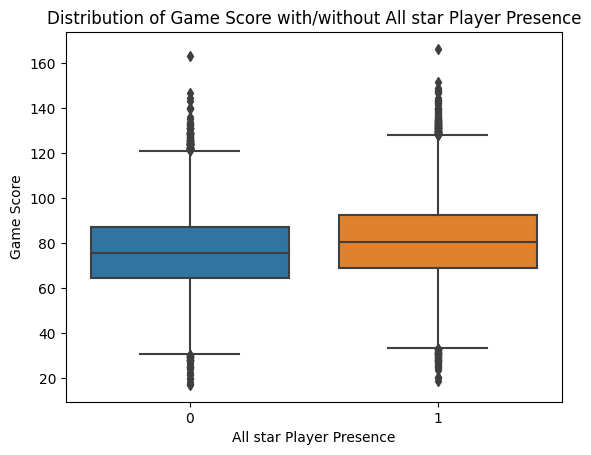

In [ ]:
# plot graphs
# Game Score with or without the star player
sns.boxplot(x='STAR_PLAYED', y='Adj_PTS', data=analysis_df)
plt.title('Distribution of Game Score with/without All star Player Presence')
plt.xlabel('All star Player Presence')
plt.ylabel('Game Score')
plt.show()

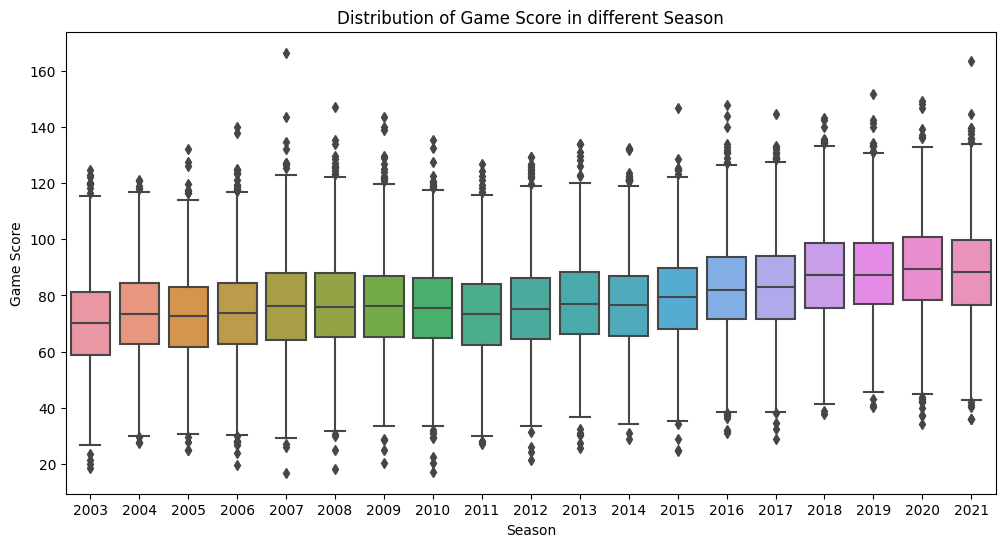

In [ ]:
# plot graphs
# Game Score in different seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x='SEASON', y='Adj_PTS', data=analysis_df)
plt.title('Distribution of Game Score in different Season')
plt.xlabel('Season')
plt.ylabel('Game Score')
plt.show()

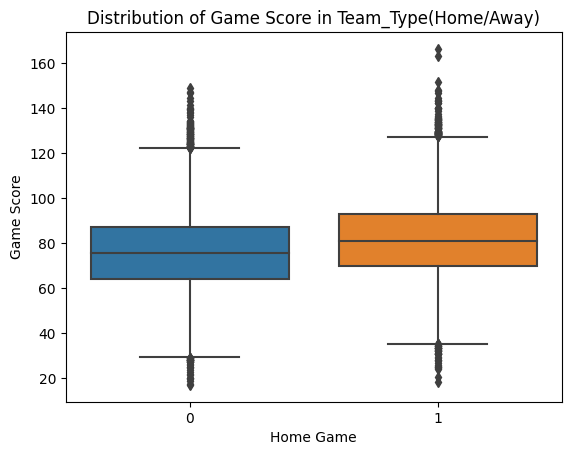

In [ ]:
# plot graphs
# Game Score in home and away
sns.boxplot(x='TEAM_TYPE', y='Adj_PTS', data=analysis_df)
plt.title('Distribution of Game Score in Team_Type(Home/Away)')
plt.xlabel('Home Game')
plt.ylabel('Game Score')
plt.show()

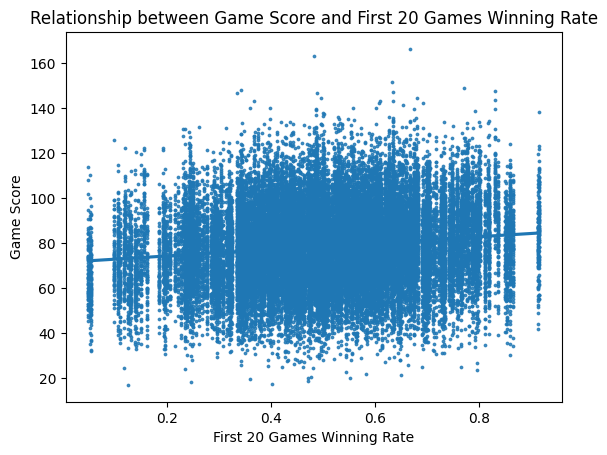

In [ ]:
# plot graphs
# Game Score with first 20 games win rate
sns.regplot(x='Outcome_20', y='Adj_PTS', data=analysis_df, scatter_kws={'s': 3})
plt.title('Relationship between Game Score and First 20 Games Winning Rate')
plt.xlabel('First 20 Games Winning Rate')
plt.ylabel('Game Score')
plt.show()

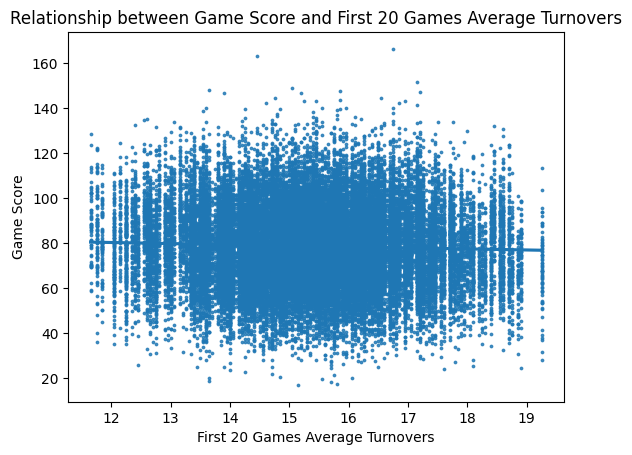

In [ ]:
# plot graphs
# Game Score with first 20 game turnovers
sns.regplot(x='TO_20', y='Adj_PTS', data=analysis_df, scatter_kws={'s': 3})
plt.title('Relationship between Game Score and First 20 Games Average Turnovers')
plt.xlabel('First 20 Games Average Turnovers')
plt.ylabel('Game Score')
plt.show()

### Analysis

In [ ]:
# OLS regressio function
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.

    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """

    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error

    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

In [ ]:
#simple difference
analysis_df[analysis_df['STAR_PLAYED'] == 1]['Adj_PTS'].mean() - analysis_df[analysis_df['STAR_PLAYED'] == 0]['Adj_PTS'].mean()

4.694497694837779

In [ ]:
# run regression
ex_var = ['STAR_PLAYED', 'TEAM_TYPE', 'PTS_x_20',   'Outcome_20',
        'FG_PCT_x_20',  'FT_PCT_x_20', 'FG3_PCT_x_20',     'AST_x_20',
           'REB_x_20',       'FGM_20',      'OREB_20',      'DREB_20',
             'STL_20',       'BLK_20',       'FGA_20',       'FTM_20',
             'FTA_20',        'TO_20',        'PF_20',
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020,           2021]
model = fit_OLS_model(analysis_df, ['Adj_PTS'], ex_var)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Adj_PTS   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:57:11   Log-Likelihood:            -1.6790e+05
No. Observations:               40188   AIC:                         3.359e+05
Df Residuals:                   40150   BIC:                         3.362e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
STAR_PLAYED      2.6537      0.187     14.201   

In [ ]:
# Bootstrap estimates of ATE
def draw_tau_hat(obs, random_state=None):
#Returns a single bootstrapped estimate of the ATE.
#Inputs:
#data: DataFrame of observed data
#random_state: integer to help standardize sampling output
#Output:
#float, estimated average treatment effect
  sample = obs.sample(n=len(obs), replace=True, random_state=random_state)
  fit_model = fit_OLS_model(sample, ['Adj_PTS'], ex_var)
  estimated_ate = fit_model.params['STAR_PLAYED']
  return estimated_ate

def get_bootstrapped_ate(obs, n=1000):
#Returns n bootstrapped estimates of the ATE.
#Inputs:
#data: DataFrame of observed data
#n: number of bootstrapped estimates we would like to return
#Output:
#list of estimated average treatment effects
  estimates = []
  for i in np.arange(n):
    estimates.append(draw_tau_hat(obs))
  return estimates

Our 95% confidence interval ranges from 2.0 to 3.0


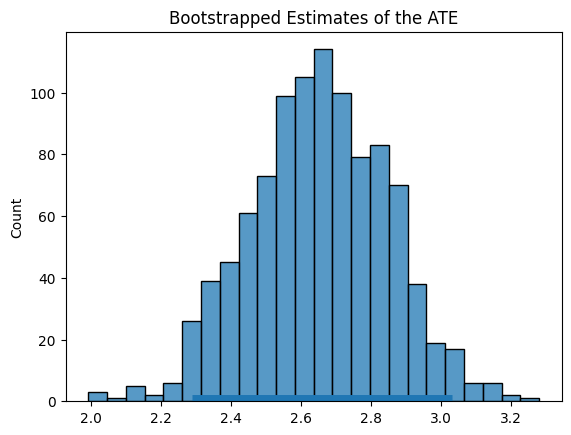

In [ ]:
ates = get_bootstrapped_ate(analysis_df, 1000)
confidence_interval = [np.percentile(ates, 2.5),
np.percentile(ates, 97.5)]
print(f"Our 95% confidence interval ranges from {np.round(confidence_interval[0])} to {np.round(confidence_interval[1])}")
sns.histplot(ates)
plt.hlines(1, confidence_interval[0], confidence_interval[1], linewidth=5)
plt.title("Bootstrapped Estimates of the ATE");